In [1]:
# Import Neccesary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# to show full columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


# Import Neccesary library for building the model

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import confusion_matrix,accuracy_score , precision_score,recall_score, f1_score,roc_curve, roc_auc_score, classification_report, precision_recall_curve
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE 

## Step 1 - Load and Understanding the data

In [2]:
# load the dataset
data = pd.read_csv('Leads.csv')

In [3]:
# look at the head of the dataset

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# check the shape of the dataset. 

data.shape

(9240, 37)

In [5]:
# Check the Description of dataset

data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- there is no outlier present in dataset. because there are no any major different between mean and 50%

In [6]:
# Show the information about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- There are missing values present in dataset

In [7]:
# check the % of missing value

missing_values = round(100*data.isnull().sum()/len(data))

missing_values.sort_values(ascending = False).head(15)  # see in descending order

Lead Quality                                     52.0
Asymmetrique Profile Score                       46.0
Asymmetrique Activity Score                      46.0
Asymmetrique Profile Index                       46.0
Asymmetrique Activity Index                      46.0
Tags                                             36.0
What is your current occupation                  29.0
Lead Profile                                     29.0
What matters most to you in choosing a course    29.0
Country                                          27.0
How did you hear about X Education               24.0
Specialization                                   16.0
City                                             15.0
Last Activity                                     1.0
Page Views Per Visit                              1.0
dtype: float64

In [8]:
data.shape

(9240, 37)

## Step 2 - Data Cleaning and Preparation Process

In [9]:
# check the columns which has 40% or more then 40% of missing value

print(data.columns[(100*data.isnull().sum()/len(data))>=40])

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [10]:
# store it in another variables

miss_col = data.columns[(100*data.isnull().sum()/len(data))>=40]

In [11]:
#### Remove the columns which have more than 40% of missing values

data.drop(miss_col, axis=1, inplace=True)

In [12]:
data.shape

(9240, 32)

In [13]:
# check the missing value in columns again

round(100*data.isnull().sum()/len(data)).sort_values(ascending = False).head(10)

Tags                                             36.0
Lead Profile                                     29.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
How did you hear about X Education               24.0
Specialization                                   16.0
City                                             15.0
Last Activity                                     1.0
TotalVisits                                       1.0
dtype: float64

#### Now, handle the missing values in columns which has less then 40%

In [14]:
# these columns will not use in analysis to drop this columns from dataset

unneccesary_cols = ['Prospect ID', 'Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
     'Get updates on DM Content','I agree to pay the amount through cheque']


data = data.drop(unneccesary_cols, axis=1)

In [15]:
data.shape

(9240, 26)

In [16]:
# Again check the missing value in each columns

missing_values = round(100*data.isnull().sum()/len(data))

missing_values.sort_values(ascending = False).head(12)

Tags                                             36.0
What is your current occupation                  29.0
Lead Profile                                     29.0
What matters most to you in choosing a course    29.0
Country                                          27.0
How did you hear about X Education               24.0
Specialization                                   16.0
City                                             15.0
TotalVisits                                       1.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
X Education Forums                                0.0
dtype: float64

In [17]:
# replace the null values with the mode values

data['Tags'].fillna(data['Tags'].mode()[0],inplace=True)

In [18]:
# Check unque values in Lead Profile column

data['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

- The mode value in 'Lead Profile' is 'Select'. So replace null value with the mode value

In [19]:
# replace the missing value with the mode value
data['Lead Profile'].fillna(data['Lead Profile'].mode()[0], inplace=True)

In [20]:
missing_values = round(100*data.isnull().sum()/len(data))

missing_values.sort_values(ascending = False).head(7)

What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Country                                          27.0
How did you hear about X Education               24.0
Specialization                                   16.0
City                                             15.0
TotalVisits                                       1.0
dtype: float64

In [21]:
# replace the missing value with the mode value of each columns which have the null value

cols = ['What is your current occupation', 'What matters most to you in choosing a course', 'Country', 'How did you hear about X Education','Specialization', 'City', 'Last Activity']

for i in cols:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [22]:
round(100*data.isnull().sum()/len(data)).sort_values(ascending=False).head(10)

TotalVisits                                      1.0
Page Views Per Visit                             1.0
Lead Number                                      0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Lead Profile                                     0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
dtype: float64

- Now we have some columns which have less than or equal to 1% of missing values. So we can drop these rows from dataset.

In [23]:
data.dropna(subset=['TotalVisits'], inplace=True)
data.dropna(subset=['Page Views Per Visit'], inplace=True)

In [24]:
# Filled the Numerical Variables missing values with the Use of Median 
for i in data.columns:
    if data[i].isnull and data[i].dtype == "float64" :
        data[i].fillna(data[i].median(),inplace=True)

In [25]:
# Now, check the null value again

round(100*data.isnull().sum()/len(data)).sort_values(ascending=False).head(6)

Lead Number                               0.0
Lead Origin                               0.0
A free copy of Mastering The Interview    0.0
City                                      0.0
Lead Profile                              0.0
Tags                                      0.0
dtype: float64

- Now, the data has cleaned

## Step 2 - Visualizing the Data

In [26]:
# Lets seperate the object variables for analysis

data_obj = []
for i in data.columns:
    if data[i].dtype == 'object':
        data_obj.append(i)

In [27]:
data_obj

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

Countplot -  Lead Origin


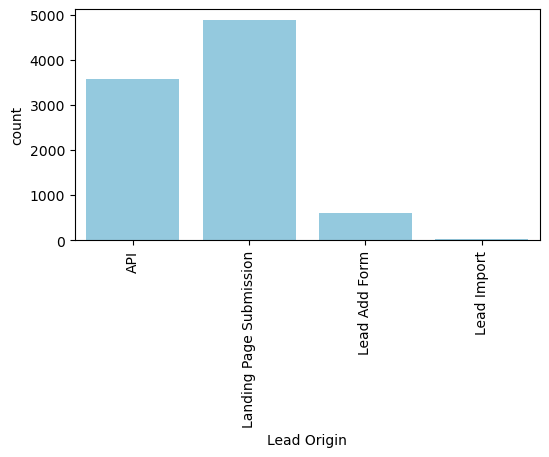

Countplot -  Lead Source


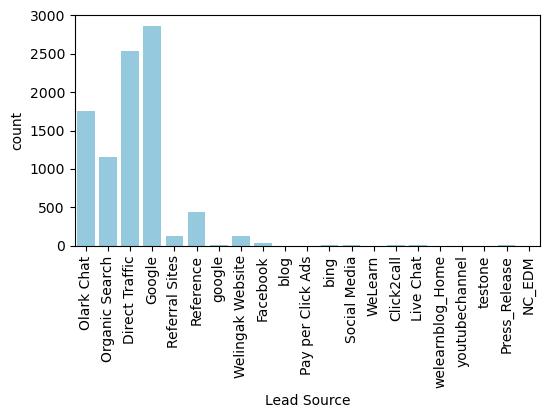

Countplot -  Do Not Email


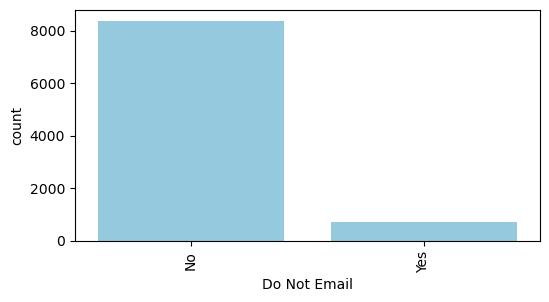

Countplot -  Do Not Call


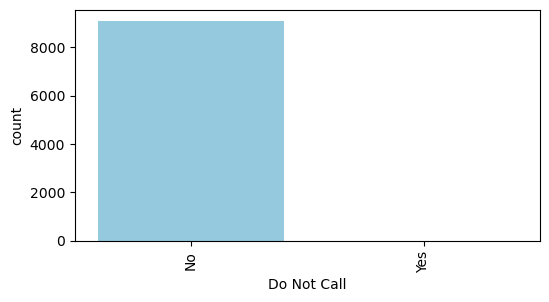

Countplot -  Last Activity


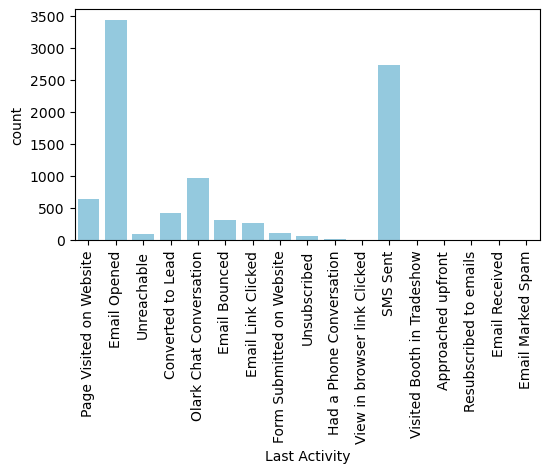

Countplot -  Country


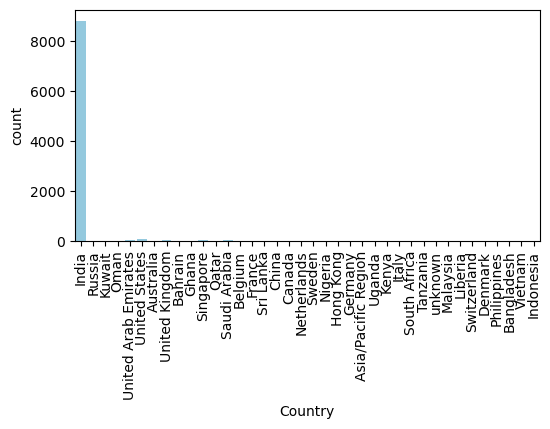

Countplot -  Specialization


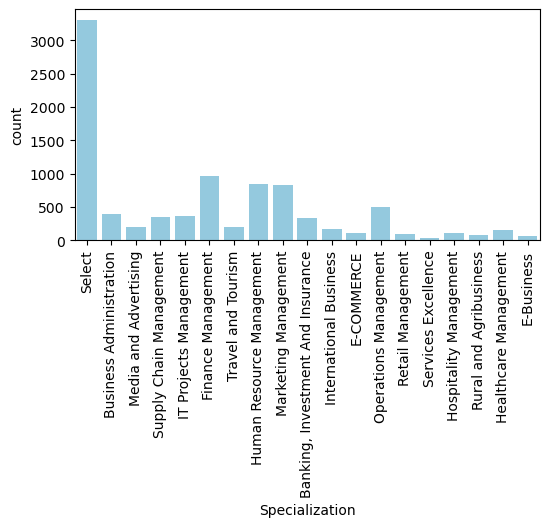

Countplot -  How did you hear about X Education


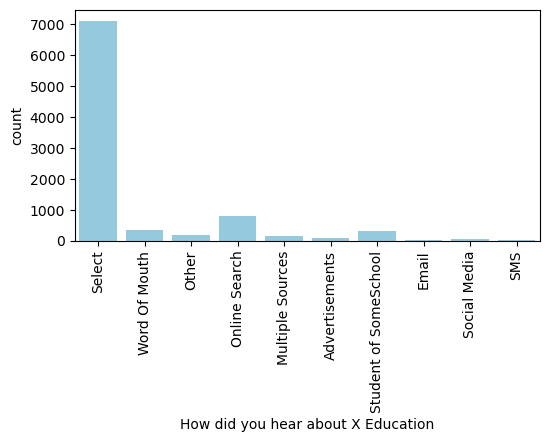

Countplot -  What is your current occupation


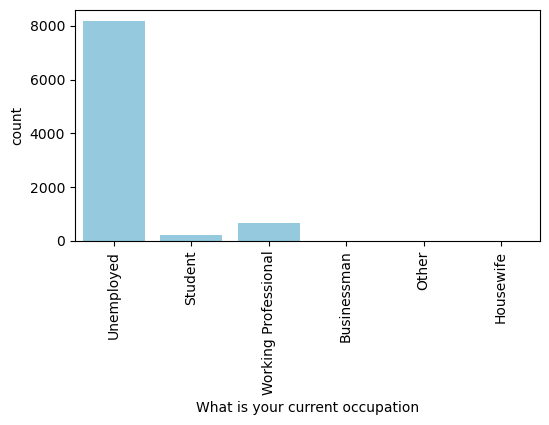

Countplot -  What matters most to you in choosing a course


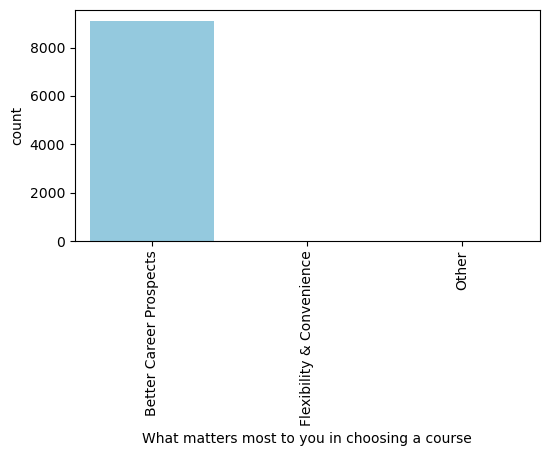

Countplot -  Search


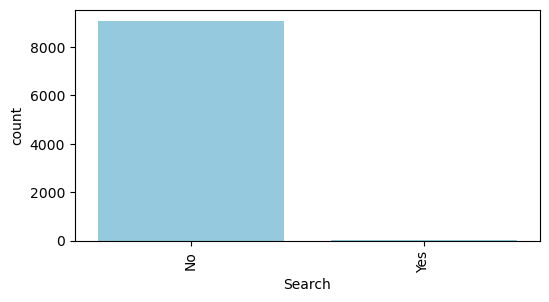

Countplot -  Newspaper Article


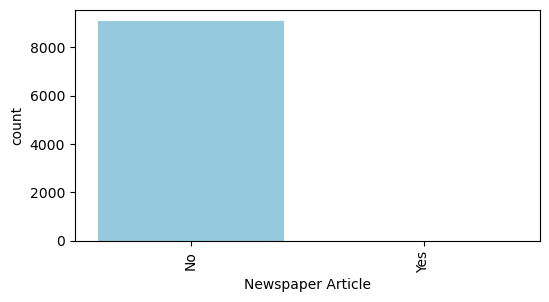

Countplot -  X Education Forums


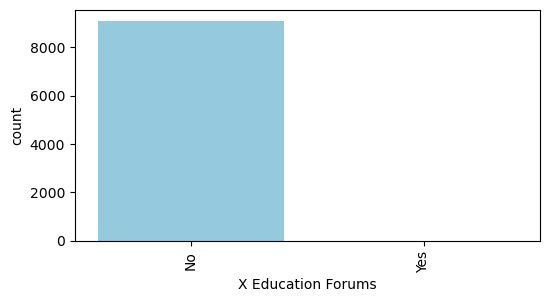

Countplot -  Newspaper


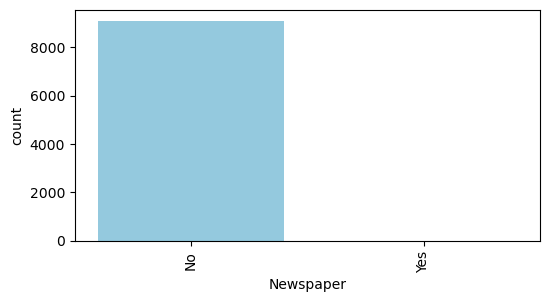

Countplot -  Digital Advertisement


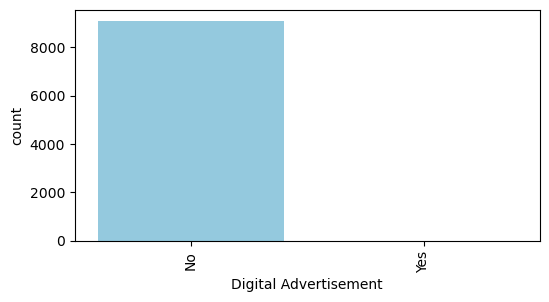

Countplot -  Through Recommendations


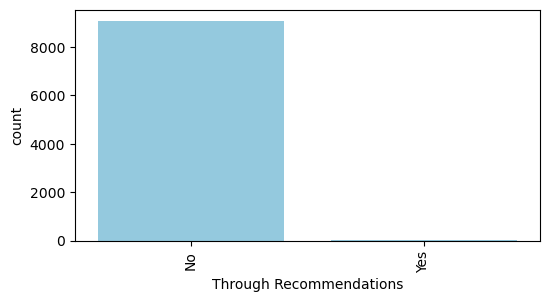

Countplot -  Tags


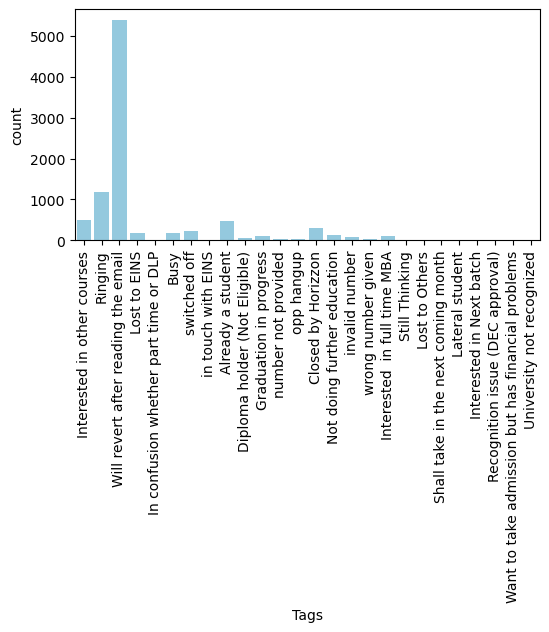

Countplot -  Lead Profile


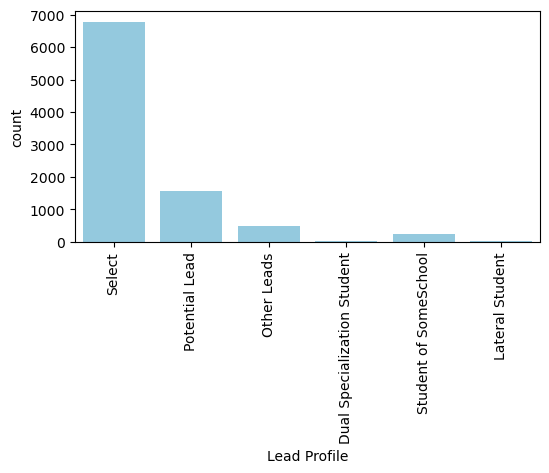

Countplot -  City


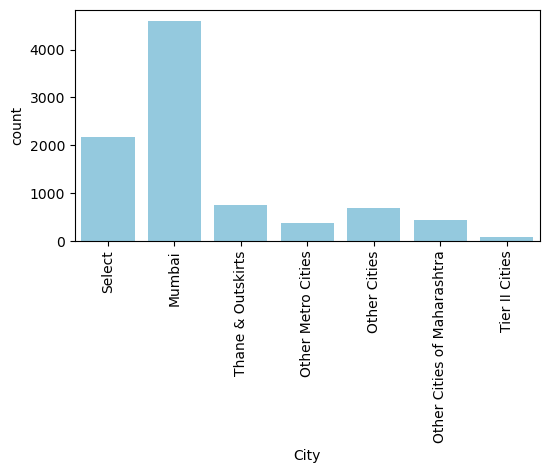

Countplot -  A free copy of Mastering The Interview


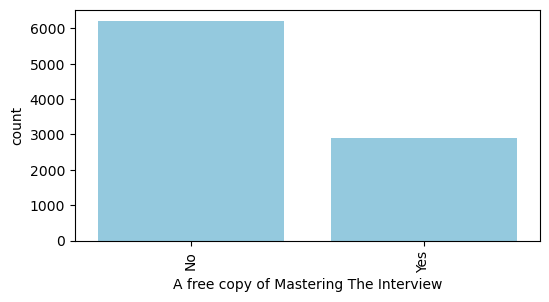

Countplot -  Last Notable Activity


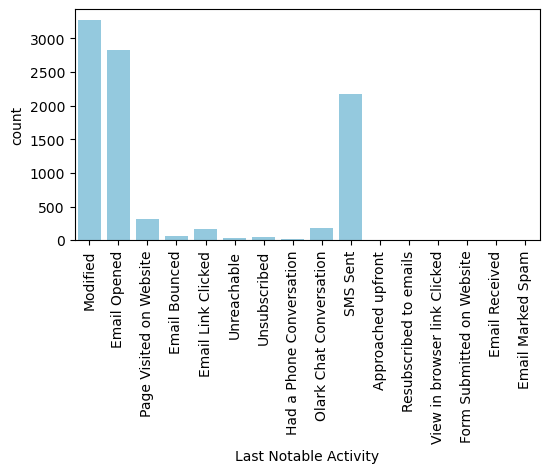

In [28]:
# plot a Countplot of the object variables

for i in data_obj:
    print("Countplot - ",i)
    plt.figure(figsize=(6,3))
    sns.countplot(x=data[i], color='skyblue')
    plt.xticks(rotation=90)
    plt.show()
    

### The insights form above analysis

- The majority of visitors to the company’s website come from Google, followed by direct traffic, which is expected in today’s internet-driven world.
- Customers are primarily identified through the "Landing Page Submission," accounting for 53%, the highest among all factors.
- Most customers have not opted for the "Do Not Mail" option.
- Similarly, the majority have not chosen the "Do Not Call" option.
- The last interaction for many customers was opening an email, followed by receiving an SMS.
- A large portion of customers are unemployed.
- Many customers are exploring courses to enhance their career prospects.
- Most customers have not searched for advertisements related to X Education.
- A significant number of customers have not read the newspaper article about the company’s courses.
- The majority have not noticed ads for X Education Forum.
- Most customers are unaware of ads for the courses in newspapers.
- Similarly, most have not encountered ads for the courses on digital media.
- Recommendations are not a common source for customer acquisition.

In [29]:
# Now lets store numeric columns in another variables

data_num_col = []
for i in data.columns:
    if data[i].dtype in ('float64','int64'):
        data_num_col.append(i)

In [30]:
# Now see the numeric columns
data_num_col

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [31]:
data_num_col2 = data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

Boxplot of  TotalVisits


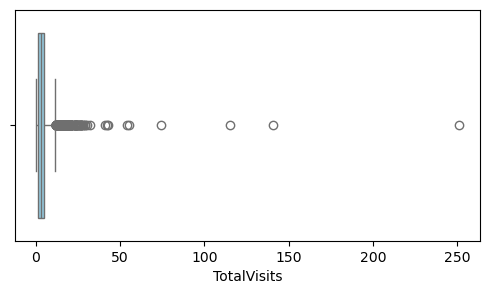

Boxplot of  Total Time Spent on Website


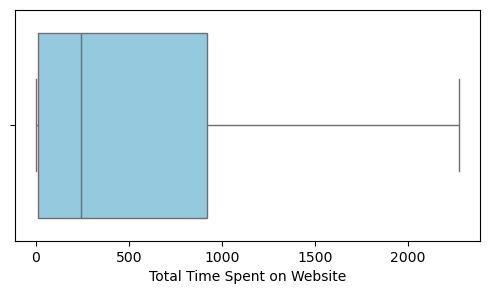

Boxplot of  Page Views Per Visit


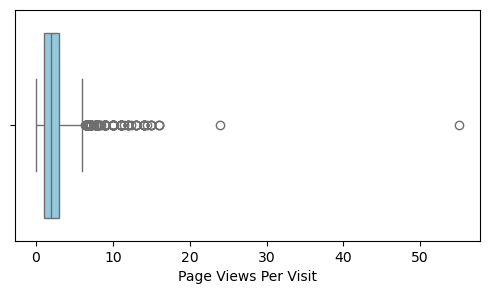

In [32]:
# plot a box plot for numeric columns

for i in data_num_col2:
    print("Boxplot of ",i)
    plt.figure(figsize=(6,3))
    sns.boxplot(x=data[i], color='skyblue')
    plt.show()

- Now, Lets analyse the target column 'Converted'

In [33]:
data.Converted.value_counts()

Converted
0    5642
1    3461
Name: count, dtype: int64

- 5642 customers are not converted and 3461 customers are converted

#### lets check the % of converted customers ratio

In [34]:
round(data.Converted.value_counts(normalize=True)*100)

Converted
0    62.0
1    38.0
Name: proportion, dtype: float64

- 62% customers are not conveted.
- 38% customers are converted

#### Now, Perform a BIVARIATE ANALYSIS on the dataset

In [35]:
data['Converted'] = data['Converted'].astype('str') # convert datatype for analysis

Countplot of  Lead Origin


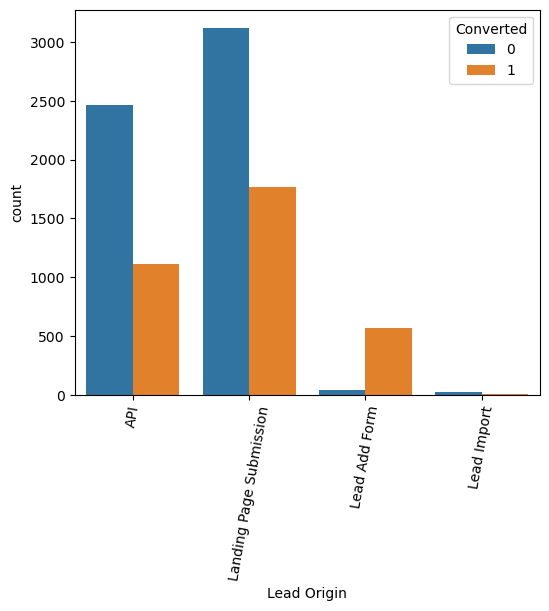

Countplot of  Lead Source


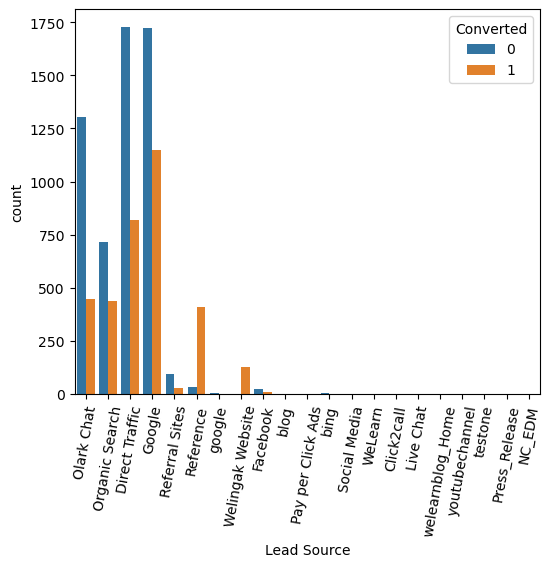

Countplot of  Do Not Email


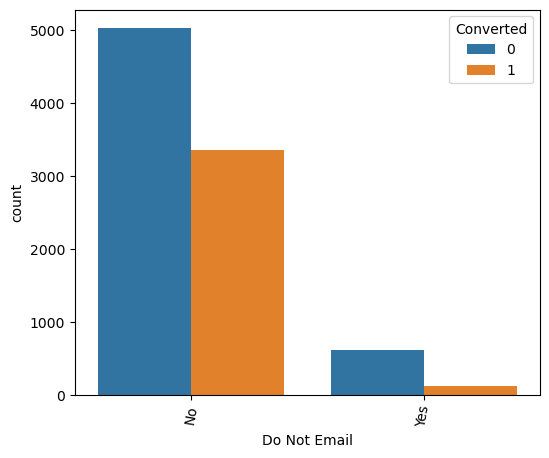

Countplot of  Do Not Call


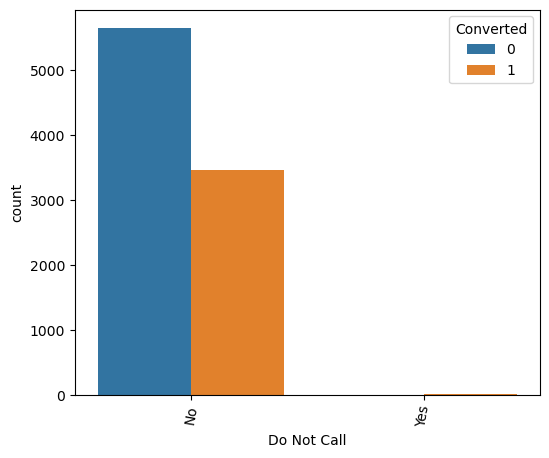

Countplot of  Last Activity


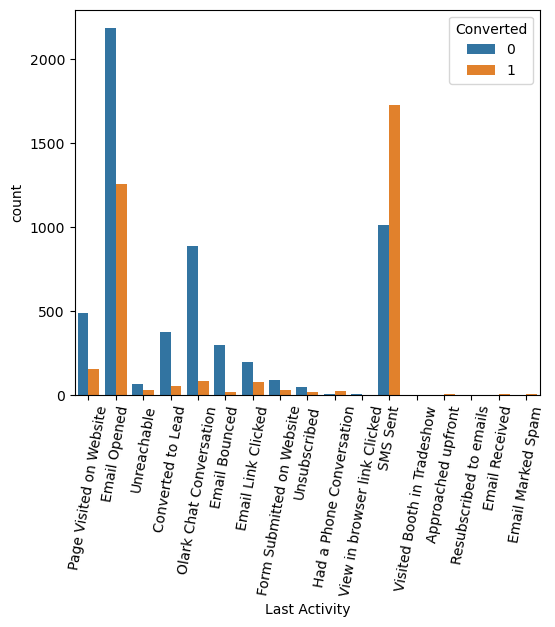

Countplot of  Country


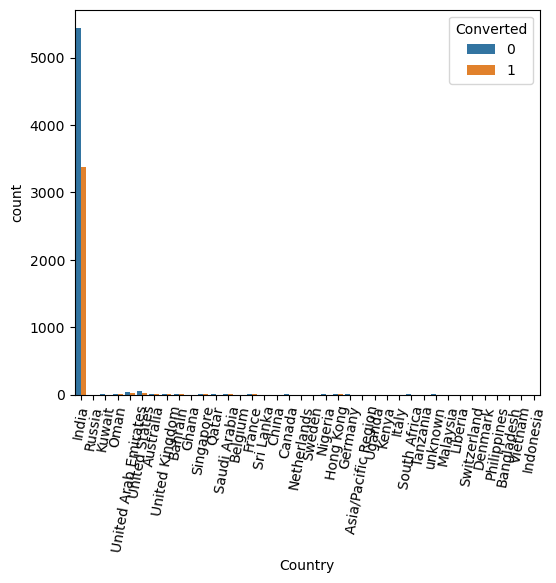

Countplot of  Specialization


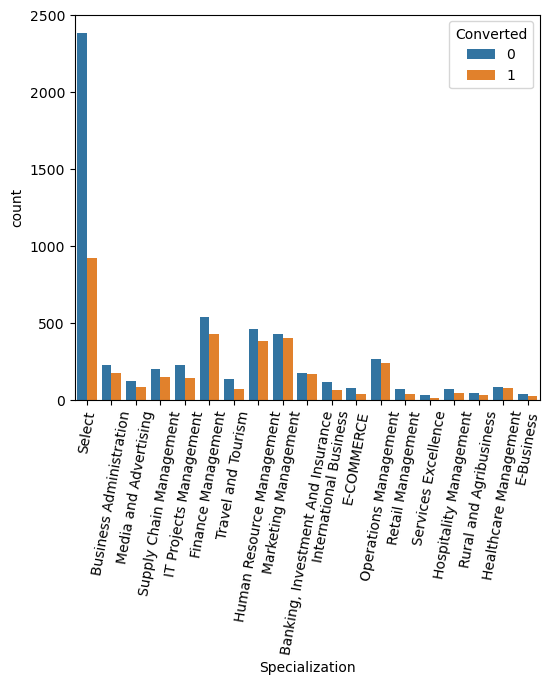

Countplot of  How did you hear about X Education


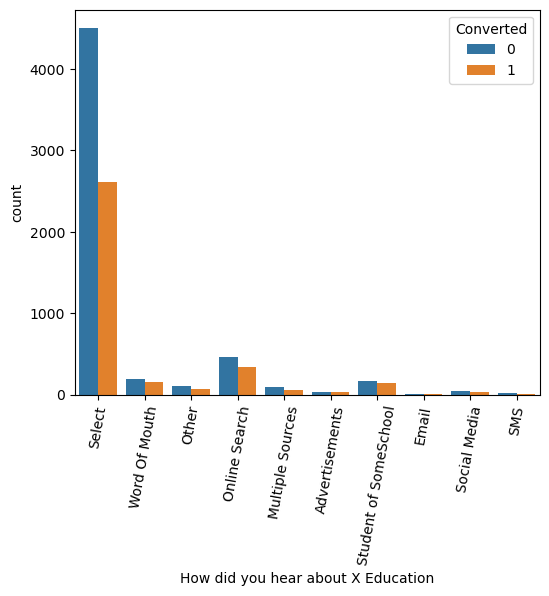

Countplot of  What is your current occupation


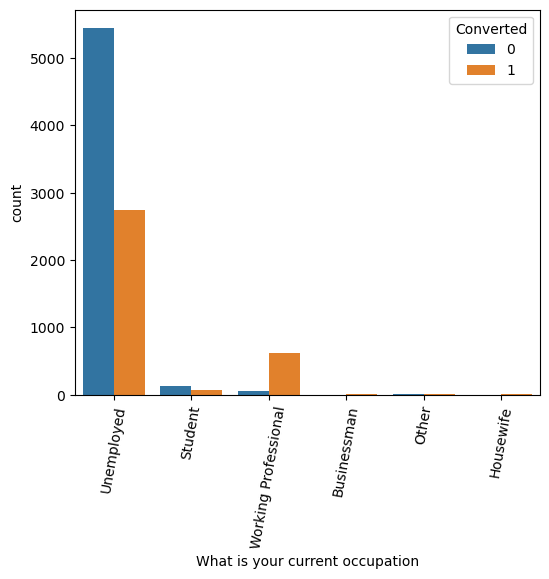

Countplot of  What matters most to you in choosing a course


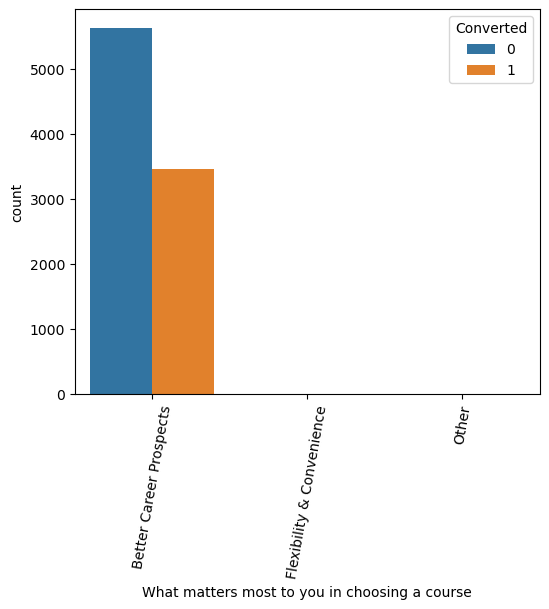

Countplot of  Search


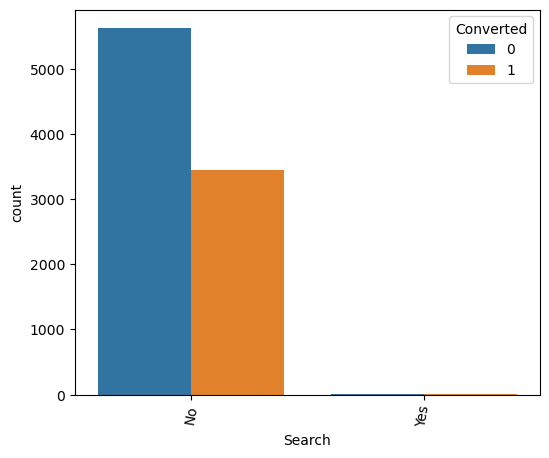

Countplot of  Newspaper Article


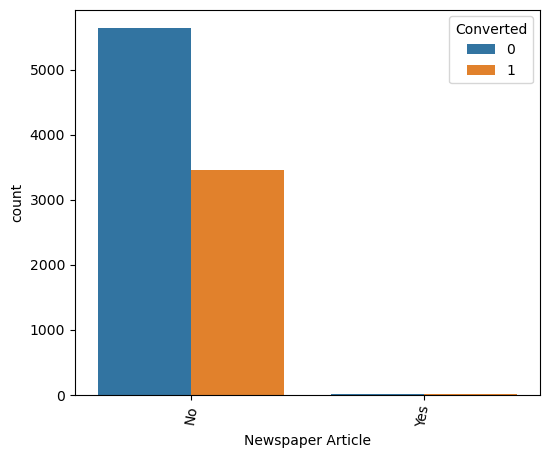

Countplot of  X Education Forums


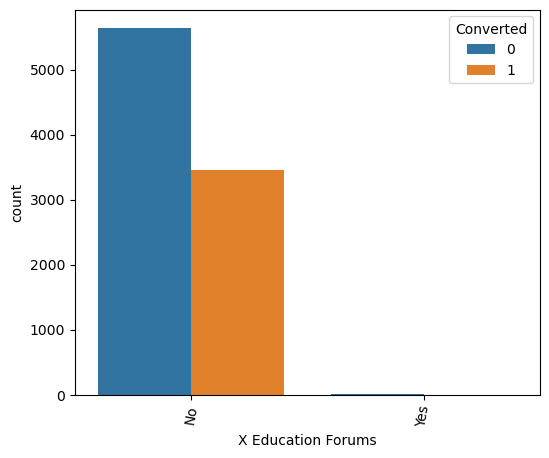

Countplot of  Newspaper


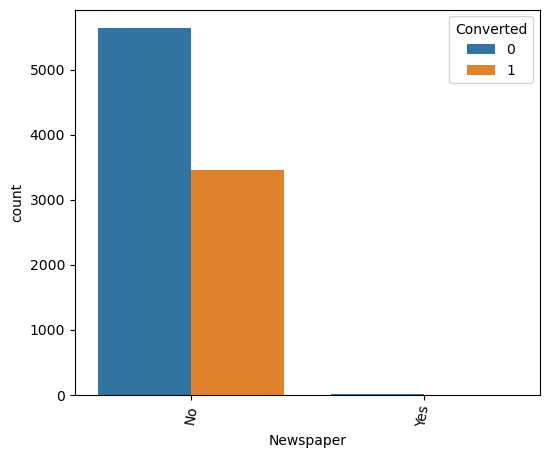

Countplot of  Digital Advertisement


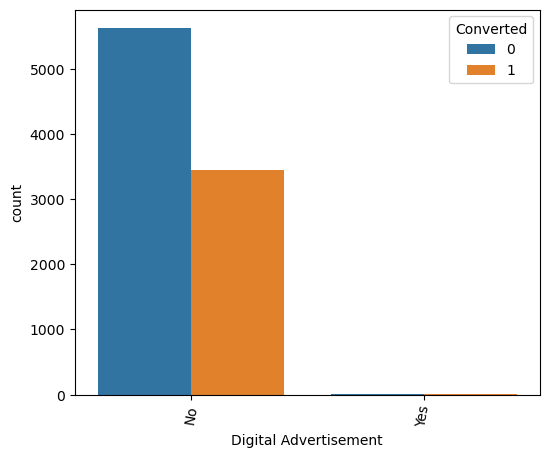

Countplot of  Through Recommendations


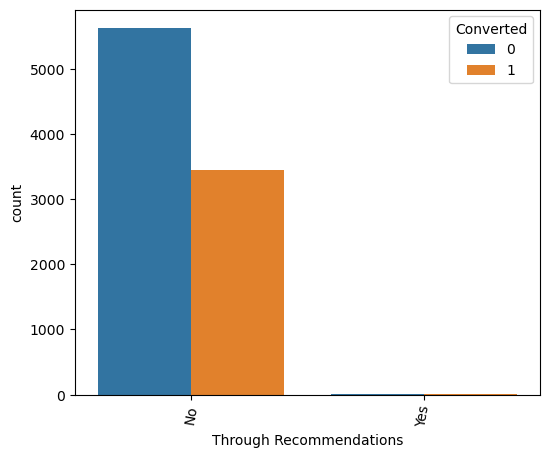

Countplot of  Tags


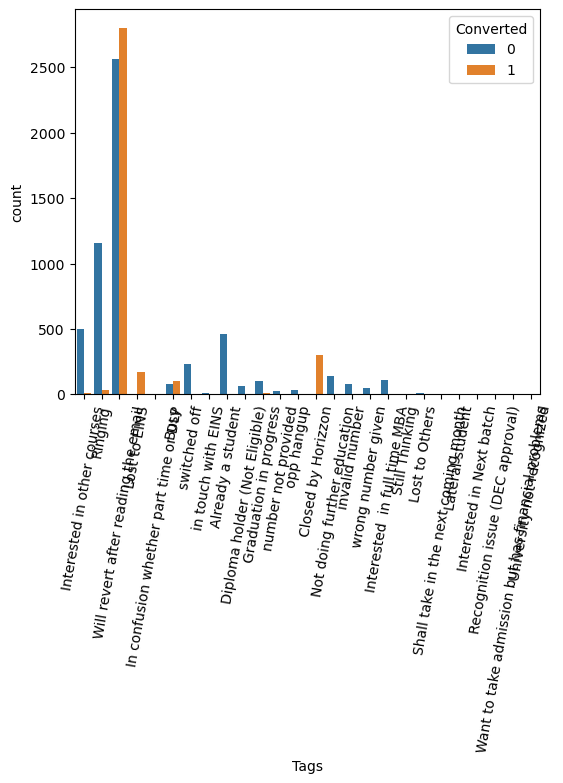

Countplot of  Lead Profile


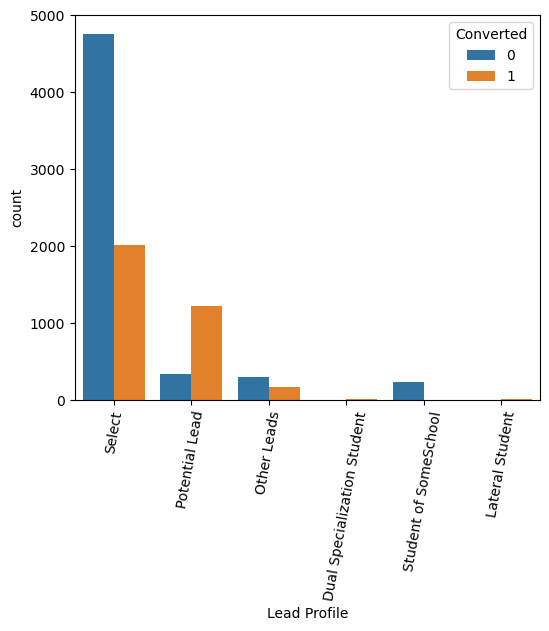

Countplot of  City


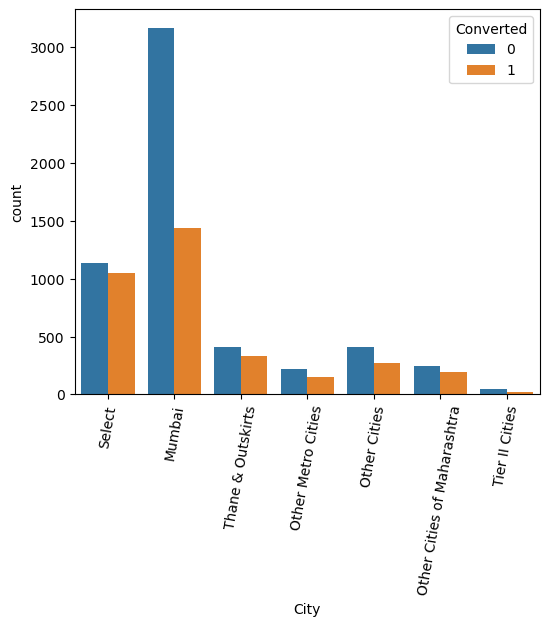

Countplot of  A free copy of Mastering The Interview


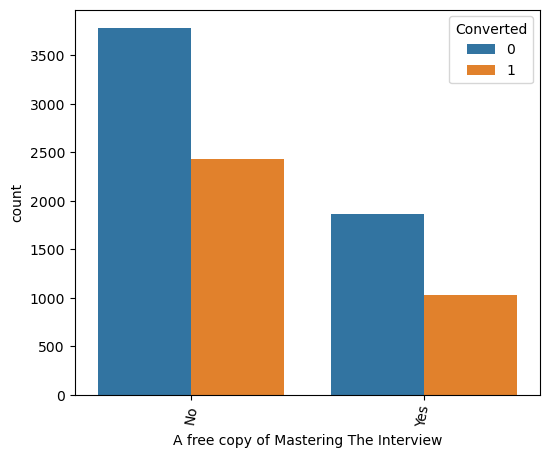

Countplot of  Last Notable Activity


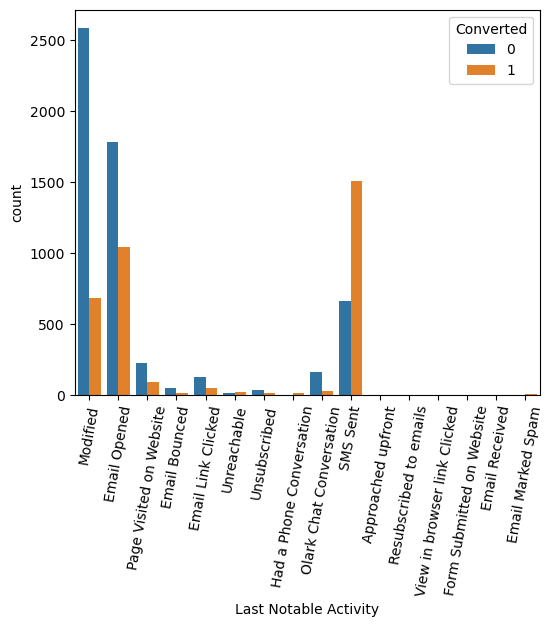

In [36]:
# plot a countplot for categorical columns

for i in data_obj:
    print("Countplot of ",i)
    plt.figure(figsize=(6,5))
    sns.countplot(x=data[i],hue='Converted',data=data)
    plt.xticks(rotation=80)
    plt.show()

### Insights for the above Bivariate analysis

- The "Loading Page submission" generates the highest number of customer conversions, whereas the "Lead Add Form" proves to be the most effective method for converting leads.
- Google stands out as the top source for lead conversions, with referrals significantly boosting trust among customers, leading to higher conversion rates.
- Customers who have not opted out of email or phone communications tend to show a greater likelihood of converting to leads.
- Customers who have had their last activity as either opening an email or receiving an SMS are more likely to convert. Among these, receiving an SMS is found to be particularly impactful in driving conversions.
- In specialization, Select has highest Conversion rating
- Customers who have not searched about the X Education have more conversion rates.
- Custermer who have not read the newspaper has more conversion rate
- In Lead Profile columns, Select has high Conversion rate as compared to potential lead or other categories

### Now, Visualize using heatmap

In [37]:
# create a correlation metrix for numeric columns

cor_table = data[data_num_col].corr()

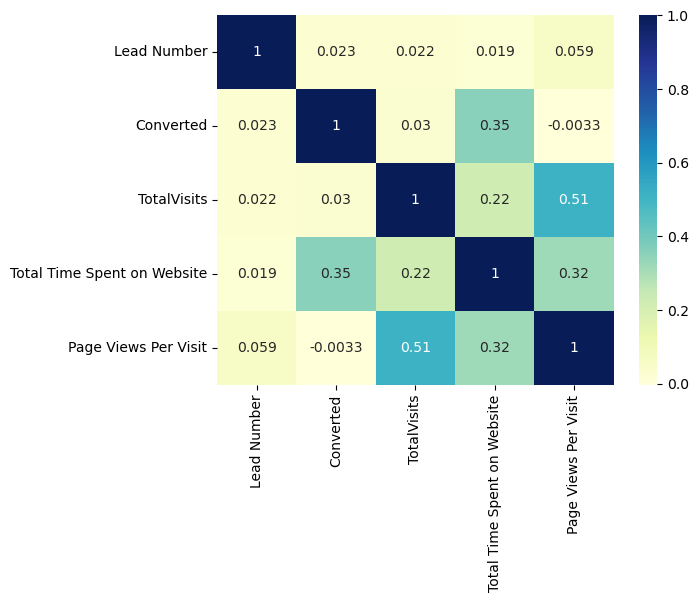

In [38]:
sns.heatmap(data=cor_table, annot=True, cmap='YlGnBu')
plt.show()

### Now, Lets check final cleaned dataset before building a model

In [39]:
data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [40]:
# dataset have many columns which have 99% of data as one value. So dropping those columns from a dataset
data.drop(columns=["Do Not Call","What matters most to you in choosing a course","Search","Newspaper Article","Digital Advertisement","Through Recommendations","Newspaper","X Education Forums"],inplace=True)

### Again check the final shape of dataset

In [41]:
data.shape

(9103, 18)

- dataset have 14 columns and 9103 rows

## Step 4 - Model Building Process

#### First, Lets create a dymmy variabls for categorical columns

In [42]:
data['Converted'] = data['Converted'].astype('int64') # again convert the datatype of the target column

In [43]:
data.Converted.dtype # varify the datatype of the target column

dtype('int64')

In [44]:
# Now seperate the categorical columns with different variables for making dummy variables

obj_col =[]
for i in data.columns:
    if data[i].dtype == 'object':
        obj_col.append(i)

In [45]:
obj_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [46]:
# create a dummy variables

data = pd.get_dummies(data=data,columns=obj_col,drop_first=True,dtype='int64')

In [47]:
data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,

### Lets Build the model

In [48]:
# Create a X and Y variable where X is Dependent variable and Y is the target varialbe

X = data.drop('Converted',axis=1)
y = data['Converted']

In [49]:
# check the shape pf both the variables

print(X.shape)
print(y.shape)

(9103, 165)
(9103,)


In [50]:
# Now split the train test 

x_train, x_test, y_train, y_test= train_test_split(X,y,train_size=0.7,random_state=100)

In [51]:
# Check the shape of Train and Test set

print("Train x.shape :",x_train.shape)
print("Test x.shape :",x_test.shape, '\n')
print("Train y.shape:",y_train.shape)
print("Test y.shape:",y_test.shape)

Train x.shape : (6372, 165)
Test x.shape : (2731, 165) 

Train y.shape: (6372,)
Test y.shape: (2731,)


In [52]:
# Scale the variables
scaler = StandardScaler()
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane

In [53]:
x_train.describe()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane

### Feature Selection and Model Building

In [54]:
# select top 15 features using RFE model

Estimator = LogisticRegression()
features = RFE(estimator=LogisticRegression(), n_features_to_select=15)
features = features.fit(x_train,y_train)
features

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [55]:
# see the feature ranking 
features_ranking = pd.DataFrame({'Feature Names':x_train.columns,'Support':features.support_,'Ranking':features.ranking_})
features_ranking.sort_values(by='Ranking',ascending=True).head(15)

,Feature Names,Support,Ranking
136,Tags_switched off,True,1
122,Tags_Lost to EINS,True,1
126,Tags_Ringing,True,1
112,What is your current occupation_Working Profes...,True,1
20,Lead Source_Welingak Website,True,1
131,Tags_Will revert after reading the email,True,1
114,Tags_Closed by Horizzon,True,1
161,Last Notable Activity_SMS Sent,True,1
27,Do Not Email_Yes,True,1
137,Tags_wrong number given,True,1


In [56]:
# see the columns which is selected by FRE feature ellimination
col_to_keep = x_train.columns[features.support_]
print(col_to_keep)

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_Yes',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Profile_Select',
       'Lead Profile_Student of SomeSchool', 'City_Select',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [57]:
# Assign it to x_train set

x_train = x_train[col_to_keep]
x_train.head(3)

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_wrong number given,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Select,Last Notable Activity_SMS Sent
7962,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5520,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1962,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


### Now, lets create the First Model

### Model 1

In [58]:
x_train_sm = sm.add_constant(x_train) # add constant
model1 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial()) # build the model
res = model1.fit() # fit the model

In [59]:
# look at the summary

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1685.4
Date:                Tue, 28 Jan 2025   Deviance:                       3370.7
Time:                        05:01:39   Pearson chi2:                 3.14e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5501
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3105      0.206    -16.068      0.000      -3.714      -2.907
Lead Origin_Lead Add Form                                1.1235      0.356      3.153      0.002       0.425       1.822
Lead Source_Welingak Website                             2.2397      0.821      2.729      0.006       0.631       3.848
Do Not Email_Yes                                        -1.2848      0.207     -6.206      0.000      -1.691      -0.879
What is your current occupation_Working Professional     2.3647      0.262      9.009      0.000       1.850       2.879
Tags_Busy                                                4.4094      0.325     13.586      0.000       3.773       5.045
Tags_Closed by Horizzon                                  9.6874      0.761     12.728      0.000       8.196      11.179
Tags_Lost to EINS                                       10.3653      0.758     13.679      0.000       8.880      11.851
Tags_Ringing                                            -0.7851      0.321     -2.447      0.014      -1.414      -0.156
Tags_Will revert after reading the email                 5.1454      0.233     22.069      0.000       4.688       5.602
Tags_switched off                                       -1.1480      0.680     -1.689      0.091      -2.480       0.184
Tags_wrong number given                                -21.4085   1.82e+04     -0.001      0.999   -3.56e+04    3.56e+04
Lead Profile_Select                                     -3.3359      0.146    -22.807      0.000      -3.623      -3.049
Lead Profile_Student of SomeSchool                      -2.9215      0.860     -3.396      0.001      -4.608      -1.235
City_Select                                              1.6771      0.120     14.026      0.000       1.443       1.911
Last Notable Activity_SMS Sent                           2.9396      0.116     25.233      0.000       2.711       3.168
========================================================================================================================
"""

In [60]:
# Calculate the VIF score for the model

# create a function to get VIF score
def vif_cal(df):
    vif = pd.DataFrame()
    vif['Feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif 

In [61]:
vif_cal(x_train_sm)

,Feature,VIF
0,const,10.205432
9,Tags_Will revert after reading the email,2.183575
8,Tags_Ringing,1.670694
1,Lead Origin_Lead Add Form,1.614666
2,Lead Source_Welingak Website,1.338904
6,Tags_Closed by Horizzon,1.328020
12,Lead Profile_Select,1.255283
13,Lead Profile_Student of SomeSchool,1.189495
14,City_Select,1.165397
10,Tags_switched off,1.159973


- P value is high for 'Tags_wrong number given'. So drop this column

In [62]:
x_train = x_train.drop('Tags_wrong number given',axis=1)

In [63]:
# check the shape of x_train set

x_train.shape

(6372, 14)

### Model 2 

In [64]:
x_train_sm = sm.add_constant(x_train)
model2 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res2 = model2.fit()

res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1687.1
Date:                Tue, 28 Jan 2025   Deviance:                       3374.3
Time:                        05:01:40   Pearson chi2:                 3.19e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5499
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3689      0.205    -16.394      0.000      -3.772      -2.966
Lead Origin_Lead Add Form                                1.1304      0.357      3.167      0.002       0.431       1.830
Lead Source_Welingak Website                             2.2300      0.821      2.716      0.007       0.621       3.839
Do Not Email_Yes                                        -1.2958      0.206     -6.277      0.000      -1.700      -0.891
What is your current occupation_Working Professional     2.3746      0.263      9.023      0.000       1.859       2.890
Tags_Busy                                                4.4715      0.324     13.815      0.000       3.837       5.106
Tags_Closed by Horizzon                                  9.7420      0.761     12.799      0.000       8.250      11.234
Tags_Lost to EINS                                       10.4217      0.758     13.754      0.000       8.937      11.907
Tags_Ringing                                            -0.7211      0.320     -2.256      0.024      -1.348      -0.095
Tags_Will revert after reading the email                 5.2027      0.233     22.356      0.000       4.747       5.659
Tags_switched off                                       -1.0809      0.679     -1.592      0.111      -2.412       0.250
Lead Profile_Select                                     -3.3334      0.146    -22.799      0.000      -3.620      -3.047
Lead Profile_Student of SomeSchool                      -2.8934      0.866     -3.342      0.001      -4.590      -1.197
City_Select                                              1.6853      0.120     14.094      0.000       1.451       1.920
Last Notable Activity_SMS Sent                           2.9274      0.116     25.253      0.000       2.700       3.155
========================================================================================================================
"""

In [65]:
# check the VIF score


vif_cal(x_train_sm)

,Feature,VIF
0,const,10.041395
9,Tags_Will revert after reading the email,2.126756
8,Tags_Ringing,1.643732
1,Lead Origin_Lead Add Form,1.614663
2,Lead Source_Welingak Website,1.338893
6,Tags_Closed by Horizzon,1.322735
11,Lead Profile_Select,1.254943
12,Lead Profile_Student of SomeSchool,1.185983
13,City_Select,1.164534
10,Tags_switched off,1.153415


- 'Tags_switched off' has high P value. So drop this  column

In [66]:
# drop 'Lead Profile_Lateral Studen' column form x_train dataset

x_train = x_train.drop('Tags_switched off',axis=1)

### Model 3 

In [67]:
x_train_sm = sm.add_constant(x_train) # add constant
model3 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial()) # build the model
res3 = model3.fit() # fit the model
res3.summary() # loot at the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1688.7
Date:                Tue, 28 Jan 2025   Deviance:                       3377.4
Time:                        05:01:40   Pearson chi2:                 3.30e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5497
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4886      0.199    -17.549      0.000      -3.878      -3.099
Lead Origin_Lead Add Form                                1.1437      0.359      3.189      0.001       0.441       1.847
Lead Source_Welingak Website                             2.2100      0.822      2.689      0.007       0.599       3.821
Do Not Email_Yes                                        -1.2934      0.206     -6.274      0.000      -1.697      -0.889
What is your current occupation_Working Professional     2.3937      0.265      9.049      0.000       1.875       2.912
Tags_Busy                                                4.6077      0.317     14.556      0.000       3.987       5.228
Tags_Closed by Horizzon                                  9.8625      0.759     12.989      0.000       8.374      11.351
Tags_Lost to EINS                                       10.5446      0.756     13.953      0.000       9.063      12.026
Tags_Ringing                                            -0.5850      0.313     -1.872      0.061      -1.198       0.027
Tags_Will revert after reading the email                 5.3289      0.225     23.655      0.000       4.887       5.770
Lead Profile_Select                                     -3.3385      0.146    -22.832      0.000      -3.625      -3.052
Lead Profile_Student of SomeSchool                      -2.8395      0.878     -3.235      0.001      -4.560      -1.119
City_Select                                              1.6986      0.120     14.214      0.000       1.464       1.933
Last Notable Activity_SMS Sent                           2.9015      0.114     25.387      0.000       2.678       3.126
========================================================================================================================
"""

In [68]:
# check the VIF score

vif_cal(x_train_sm)

,Feature,VIF
0,const,9.323974
9,Tags_Will revert after reading the email,1.873059
1,Lead Origin_Lead Add Form,1.614359
8,Tags_Ringing,1.524804
2,Lead Source_Welingak Website,1.338871
6,Tags_Closed by Horizzon,1.297317
10,Lead Profile_Select,1.249830
11,Lead Profile_Student of SomeSchool,1.174957
12,City_Select,1.156574
4,What is your current occupation_Working Profes...,1.150689


- "Tags_Ringing" have high P value so drop this column

In [69]:
x_train = x_train.drop('Tags_Ringing',axis=1)

### Model 4

In [70]:
x_train_sm = sm.add_constant(x_train) # add constant
model4 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial()) # build the model
res4 = model4.fit() # fit the model
res4.summary() # loot at the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.5
Date:                Tue, 28 Jan 2025   Deviance:                       3381.0
Time:                        05:01:40   Pearson chi2:                 3.25e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5494
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7030      0.173    -21.459      0.000      -4.041      -3.365
Lead Origin_Lead Add Form                                1.1037      0.351      3.143      0.002       0.415       1.792
Lead Source_Welingak Website                             2.2441      0.819      2.742      0.006       0.640       3.848
Do Not Email_Yes                                        -1.2860      0.206     -6.244      0.000      -1.690      -0.882
What is your current occupation_Working Professional     2.4308      0.267      9.103      0.000       1.907       2.954
Tags_Busy                                                4.8596      0.292     16.643      0.000       4.287       5.432
Tags_Closed by Horizzon                                 10.0953      0.751     13.436      0.000       8.623      11.568
Tags_Lost to EINS                                       10.7753      0.748     14.405      0.000       9.309      12.241
Tags_Will revert after reading the email                 5.5660      0.195     28.497      0.000       5.183       5.949
Lead Profile_Select                                     -3.3579      0.146    -22.954      0.000      -3.645      -3.071
Lead Profile_Student of SomeSchool                      -2.7458      0.902     -3.044      0.002      -4.514      -0.978
City_Select                                              1.7072      0.120     14.281      0.000       1.473       1.941
Last Notable Activity_SMS Sent                           2.8622      0.112     25.647      0.000       2.643       3.081
========================================================================================================================
"""

In [71]:
# check the VIF score

vif_cal(x_train_sm)

,Feature,VIF
0,const,7.736817
1,Lead Origin_Lead Add Form,1.611723
2,Lead Source_Welingak Website,1.338224
8,Tags_Will revert after reading the email,1.282830
6,Tags_Closed by Horizzon,1.233228
9,Lead Profile_Select,1.232883
4,What is your current occupation_Working Profes...,1.150439
10,Lead Profile_Student of SomeSchool,1.149772
11,City_Select,1.148738
12,Last Notable Activity_SMS Sent,1.091954


'Lead Origin_Lead Add Form' have a high P value so drop this column 

In [72]:
x_train = x_train.drop('Lead Origin_Lead Add Form',axis=1)

### Model 5

In [73]:
x_train_sm = sm.add_constant(x_train) # add constant
model5 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial()) # build the model
res5 = model5.fit() # fit the model
res5.summary() # loot at the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1696.0
Date:                Tue, 28 Jan 2025   Deviance:                       3392.1
Time:                        05:01:41   Pearson chi2:                 3.23e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5486
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6729      0.171    -21.491      0.000      -4.008      -3.338
Lead Source_Welingak Website                             3.3173      0.744      4.459      0.000       1.859       4.775
Do Not Email_Yes                                        -1.2718      0.204     -6.237      0.000      -1.672      -0.872
What is your current occupation_Working Professional     2.4556      0.270      9.109      0.000       1.927       2.984
Tags_Busy                                                4.8633      0.293     16.601      0.000       4.289       5.437
Tags_Closed by Horizzon                                 10.2841      0.748     13.746      0.000       8.818      11.751
Tags_Lost to EINS                                       10.8115      0.748     14.456      0.000       9.346      12.277
Tags_Will revert after reading the email                 5.6019      0.195     28.683      0.000       5.219       5.985
Lead Profile_Select                                     -3.4247      0.145    -23.640      0.000      -3.709      -3.141
Lead Profile_Student of SomeSchool                      -2.8214      0.904     -3.123      0.002      -4.592      -1.051
City_Select                                              1.7590      0.118     14.908      0.000       1.528       1.990
Last Notable Activity_SMS Sent                           2.8845      0.111     25.874      0.000       2.666       3.103
========================================================================================================================
"""

In [74]:
# check the VIF score

vif_cal(x_train_sm)

,Feature,VIF
0,const,7.690707
7,Tags_Will revert after reading the email,1.264418
8,Lead Profile_Select,1.185490
9,Lead Profile_Student of SomeSchool,1.144192
3,What is your current occupation_Working Profes...,1.139878
5,Tags_Closed by Horizzon,1.123021
10,City_Select,1.090442
11,Last Notable Activity_SMS Sent,1.082743
1,Lead Source_Welingak Website,1.060633
4,Tags_Busy,1.057530


'Lead Profile_Student of SomeSchool' have high  p value. So drop this column 

In [75]:
x_train = x_train.drop('Lead Profile_Student of SomeSchool',axis=1)

### Model 6

In [76]:
x_train_sm = sm.add_constant(x_train) # add constant
model6 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial()) # build the model
res6 = model6.fit() # fit the model
res6.summary() # loot at the summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1705.1
Date:                Tue, 28 Jan 2025   Deviance:                       3410.1
Time:                        05:01:41   Pearson chi2:                 3.55e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5473
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8587      0.168    -23.034      0.000      -4.187      -3.530
Lead Source_Welingak Website                             3.3316      0.744      4.481      0.000       1.874       4.789
Do Not Email_Yes                                        -1.2749      0.204     -6.259      0.000      -1.674      -0.876
What is your current occupation_Working Professional     2.4808      0.273      9.094      0.000       1.946       3.015
Tags_Busy                                                4.9839      0.293     16.989      0.000       4.409       5.559
Tags_Closed by Horizzon                                 10.4076      0.748     13.908      0.000       8.941      11.874
Tags_Lost to EINS                                       10.9262      0.748     14.599      0.000       9.459      12.393
Tags_Will revert after reading the email                 5.7296      0.195     29.330      0.000       5.347       6.112
Lead Profile_Select                                     -3.3656      0.143    -23.490      0.000      -3.646      -3.085
City_Select                                              1.7249      0.117     14.686      0.000       1.495       1.955
Last Notable Activity_SMS Sent                           2.9210      0.112     26.056      0.000       2.701       3.141
========================================================================================================================
"""

In [77]:
# check the VIF score

vif_cal(x_train_sm)

,Feature,VIF
0,const,6.836540
7,Tags_Will revert after reading the email,1.237252
3,What is your current occupation_Working Profes...,1.134475
5,Tags_Closed by Horizzon,1.112749
8,Lead Profile_Select,1.091315
9,City_Select,1.084500
10,Last Notable Activity_SMS Sent,1.077652
1,Lead Source_Welingak Website,1.060633
4,Tags_Busy,1.055531
6,Tags_Lost to EINS,1.050855


- Now, we have not any columns which has high P value and high VIF score.
- Model 6 Consider as final model 

### Next step is to Evaluate the model

In [78]:
y_train_pred = res6.predict(sm.add_constant(x_train))
y_train_pred.head(10)

7962    0.013343
5520    0.373887
1962    0.000728
1566    0.987278
9170    0.105853
5097    0.183204
8954    0.281357
309     0.183204
5519    0.806311
1050    0.866554
dtype: float64

In [79]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
7962,0,0.013343
5520,0,0.373887
1962,0,0.000728
1566,1,0.987278
9170,0,0.105853


In [80]:

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
7962,0,0.013343,0
5520,0,0.373887,0
1962,0,0.000728,0
1566,1,0.987278,1
9170,0,0.105853,0


In [81]:
# create a confusion metrix

confusion = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])
print(confusion)

[[3715  238]
 [ 313 2106]]


In [82]:
# calculate the accuracy

accuracy = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(accuracy)

0.9135279347143754


In [83]:
# Evaluate the other metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Calculating the sensitivity

TP/(TP+FN)

0.8706076891277388

In [85]:
# Calculating the specificity

TN/(TN+FP)

0.9397925626106755

### Now, lets Find the Optimal Cutoff

In [86]:
#  write a ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob,drop_intermediate=False)

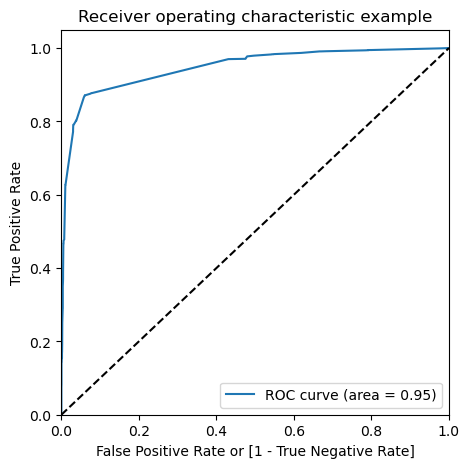

In [88]:
# drow the roc curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### "The ROC curve has an area of 0.95, which indicates a strong model performance. Now, let's examine the tradeoff between sensitivity and specificity to identify the optimal threshold."

In [89]:
# create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(3)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7962,0,0.013343,0,1,0,0,0,0,0,0,0,0,0
5520,0,0.373887,0,1,1,1,1,0,0,0,0,0,0
1962,0,0.000728,0,1,0,0,0,0,0,0,0,0,0


In [90]:
 # different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.695386  0.970649  0.526942
0.2   0.2  0.904426  0.877222  0.921073
0.3   0.3  0.911959  0.871848  0.936504
0.4   0.4  0.913214  0.870608  0.939287
0.5   0.5  0.913528  0.870608  0.939793
0.6   0.6  0.901601  0.801984  0.962560
0.7   0.7  0.901601  0.790823  0.969390
0.8   0.8  0.894696  0.771807  0.969896
0.9   0.9  0.797395  0.478297  0.992664


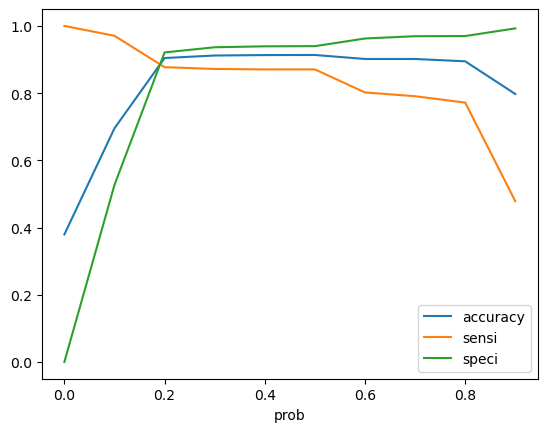

In [91]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### "As observed, the optimal values for the three metrics occur around a cutoff of `0.2`. Therefore, we will use 0.2 as our threshold."'

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7962,0,0.013343,0,1,0,0,0,0,0,0,0,0,0,0
5520,0,0.373887,0,1,1,1,1,0,0,0,0,0,0,1
1962,0,0.000728,0,1,0,0,0,0,0,0,0,0,0,0
1566,1,0.987278,1,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.105853,0,1,1,0,0,0,0,0,0,0,0,0


In [93]:
# Let's finding the `accuracy`

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9044256120527306

In [94]:
# Now, let's create the confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3641,  312],
       [ 297, 2122]], dtype=int64)

In [95]:
# Evaluate the other metrics

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [96]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.8772219925589086

In [97]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.9210726030862636

## Step 5: Making Predictions on the Test Set

In [98]:
# Scaling the test set as well using just 'transform'

x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [99]:
# Selecting the columns in X_train for X_test as well

x_test = x_test[col_to_keep]
x_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_wrong number given,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Select,Last Notable Activity_SMS Sent
3504,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4050,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7201,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1196,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8219,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [100]:
# add a constant 

x_test_sm = sm.add_constant(x_test[col_to_keep])

# Checking X_test_sm
x_test_sm.head()

,const,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_wrong number given,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Select,Last Notable Activity_SMS Sent
3504,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4050,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7201,1.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1196,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8219,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [101]:
# Make predictions on the test set and store it in the variable 'y_test_pred' variable

y_test_pred = res.predict(sm.add_constant(x_test))

In [102]:
y_test_pred.head(10)

3504    0.000592
4050    0.997262
7201    0.006748
1196    0.000592
8219    0.976315
8747    0.182281
9048    0.058095
6524    0.001297
7693    0.006748
8187    0.155614
dtype: float64

In [103]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [104]:
# Let's see the head

y_pred_1.head()

,0
3504,0.000592
4050,0.997262
7201,0.006748
1196,0.000592
8219,0.976315


In [105]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [106]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.000592
1,1,0.997262
2,0,0.006748
3,0,0.000592
4,1,0.976315


In [109]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [110]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.000592
1,1,0.997262
2,0,0.006748
3,0,0.000592
4,1,0.976315


In [111]:
# Make predictions on the test set using 0.2 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [112]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.000592,0
1,1,0.997262,1
2,0,0.006748,0
3,0,0.000592,0
4,1,0.976315,1


In [113]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.906993775173929

In [114]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1579,  110],
       [ 144,  898]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.8618042226487524

In [117]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.9348727057430433

### The overall Accuracy of Our model is 90%. which is pretty good